<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_jupiternb_muvelek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok Jupiternb műveletek

<https://klajosw.blogspot.com/>


---

In [0]:
import time
from IPython.display import clear_output
from ipythonblocks import BlockGrid, colors
grid = BlockGrid(width=5, height=5,
                 fill=colors['Purple'])
grid.show()

,,,,
,,,,
,,,,
,,,,
,,,,


In [0]:
grid[0, 0] = colors['Lime']
grid[-1, 0] = colors['Lime']
grid[:, -1] = colors['Lime']
grid.show()

,,,,
,,,,
,,,,
,,,,
,,,,


In [0]:
n = 5
grid = BlockGrid(width=2 * n + 1,
                 height=2 * n + 1,
                 fill=colors['White'])
A = grid[n + 1:, :n]
B = grid[:n, n + 1:]
C = grid[n + 1:, n + 1:]
A[:, :] = colors['Cyan']
B[:, :] = colors['Lime']
C[:, :] = colors['Yellow']
grid.show()

,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,


In [0]:
for i in range(n):
    for j in range(n):
        # We reset the matrix colors.
        A[:, :] = colors['Cyan']
        B[:, :] = colors['Lime']
        C[:, :] = colors['Yellow']
        # We highlight the adequate rows
        # and columns in red.
        A[i, :] = colors['Red']
        B[:, j] = colors['Red']
        C[i, j] = colors['Red']
        # We animate the grid in the loop.
        clear_output()
        grid.show()
        time.sleep(.25)

,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,


Populating the interactive namespace from numpy and matplotlib


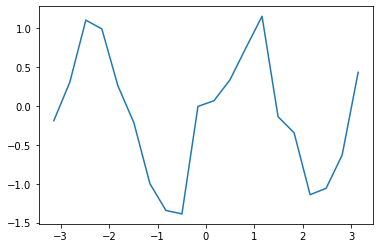

In [0]:
## Egyszerű plot négyzet függvény
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline 

## Töltsük be ezeket az adatokat tömbbe:

#eltelt ido
t=[-3.14159265, -2.81089869, -2.48020473, -2.14951076, -1.8188168 ,
       -1.48812284, -1.15742887, -0.82673491, -0.49604095, -0.16534698,
        0.16534698,  0.49604095,  0.82673491,  1.15742887,  1.48812284,
        1.8188168 ,  2.14951076,  2.48020473,  2.81089869,  3.14159265];

#megtett ut
s=[-0.18917675,  0.30733932,  1.10617134,  0.99301702,  0.26214699,
       -0.21526465, -0.99894001, -1.34350261, -1.38845013, -0.00443704,
        0.06863757,  0.33781392,  0.75168117,  1.15622707, -0.13737408,
       -0.34339706, -1.14117694, -1.0584432 , -0.63149239,  0.43437089];

#meresi hiba
err=[0.2, 0.1, 0.1, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.1, 0.1, 
     0.4, 0.4, 0.5, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2]

## A plot parancs segítségével egy gyors pillantást vethetünk a mért adatsorra.
plot(t,s);





A függvény illesztéshez használt függvényt python szintaxis szerint definiáljuk az alábbiak szerint (fizikai jelenségeken alapuló intuició vagy a mérés leírás által javasolt függvény alak alapján):


A függvény illesztéshez használt függvényt python szintaxis szerint definiáljuk az alábbiak szerint (fizikai jelenségeken alapuló intuició vagy a mérés leírás által javasolt függvény alak alapján)

A fent definiált függvény négy bemenő paraméterrel rendelkezik, ebből az első az ilesztés során felhasznált változó, a maradék három pedig az illesztendő paraméterek.

*FIGYELEM: python-ban a függvények, ciklusok és egyéb egybe tartozó struktúrák szeparálásához indentálást, azaz a megfelelő sorok behúzását használjuk! *

Az alábbi kódcellában a fent definiált func függvényt fogjuk illeszteni a mért adatokra. A curve_fit parancs segítségével megtörténik az illesztés. A kimenő popt változó tartalmazza a három illesztési paramétert a pcov változó pedig az illesztési paraméterek kovariancia mátrixa melynek diagonális elemei meghatározzák az illesztés hibáját.



In [0]:
from scipy.optimize import curve_fit

def func(t,a,b,c):            # Ez a sor tartalmazza a fügvény nevét és a bemenő paramétereket
    return (a*sin(b*t)+c)     # Ez a sor tartalmazza a visszatérési értékeket. 

popt, pcov = curve_fit(func, t, s) #Ez a sor teszi meg az illesztést
perr = sqrt(diag(pcov))            #A kovariancia mátrix diagonális elemeinek gyöke az illesztés hibája
print(popt)                        #Az illesztési paraméterek megtekintése
print(perr)                        #A hibák megtekintése
#a popt változó egy akkora tömb ahány illesztési paraméter van, jelen esetben popt=[a,b,c] azaz három elemű tömb
#a pcov a popt-ben szereplő 

[-2.31020245  1.02611318  0.04431111]
[1.23424159e+08 1.02506757e+06 3.25807362e+06]


A curve_fit függvény segítségével mérési hibákat is figyelembe tudjuk venni, illetve az illesztési paraméterek becslésére is van lehetőség. A p0 opcionális bemenő paraméterrel az illesztéshez használt paraméterek becsült kezdőértékeit állíthatjuk be a sigma opcionális paraméter pedig az esetleges mérési hibákat tartalmazza melyeket súlyozott illesztésre használhatunk. Az alábbi kód cellában illesztést hajtunk végre ahol figyelembe vesszük a mérési hibákat és az illesztendő paraméterek kezdőértékét a hiba nélküli illesztett paraméternek vesszük:

In [0]:
poptwe, pcovwe = curve_fit(func, t, s,p0=popt,sigma=err)
perrwe = sqrt(diag(pcovwe))
print(poptwe)
print(perrwe)

[ 1.05782091  2.06604138 -0.0639237 ]
[0.08819267 0.03528329 0.05365839]


### Illesztési paraméterek mérési hiba szerint súlyozva:

Változó neve | értéke | illesztési hiba ------------ | ------------- a | 1.06 m|  ±  0.09 m b | 2.07 Hz |  ±  0.035Hz c | -0.06 m |  ±  0.05 m

Mindíg fontos az igényes, feliratozott, áttekinthető ábrák készítése! 

A notebook környezetben ez legkézenfekvőbben a Matplotlib csomaggal történik. Az alábbi kód cellában egy példát látunk egy igényesen elkészített ábrára sok comment-el ellátva.


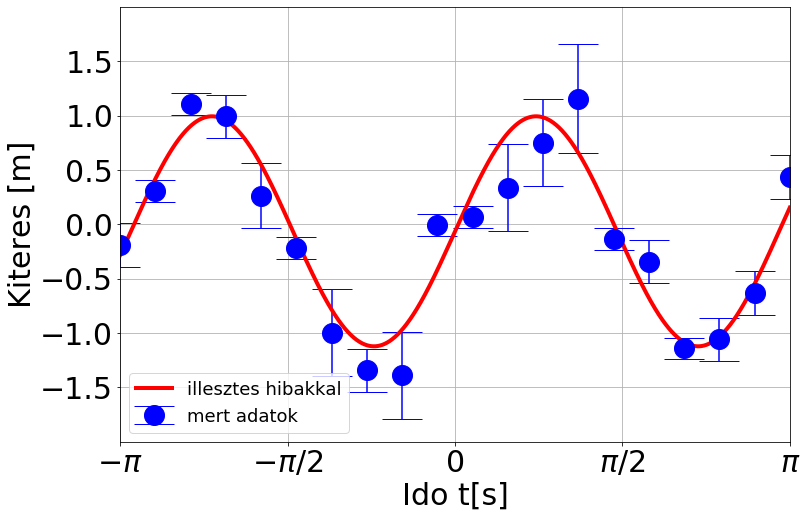

In [0]:
figsize(12,8) #Az ábra méretének beállítása

#Az alábbi parancs a plot parancshoz hasonló ám a mérési hibákat is ábrázolhatjuk vele
errorbar(t,                                             # mérési pontok tömbje
         s,                                             # mért értékek tömbje
         err,                                           # hibák tömbje
         label='mert adatok',                           # a feliratozásnál használt string
         ms=20,marker='o',color='b',capsize=20,ls='')   # az ábrázolás egyéb paraméterei

#Analitikus vagy numerikusan exakt függvények ábrázolásakor először is le kell generálnunk kiértékelési pontokat
tt=linspace(-pi,pi,3000); # kiértékelési pontok sűrű mintavételezéssel
# az illesztett függvény megjelenítése
plot(tt,                                                # az illesztett függvény kiértékelésének helyei
     func(tt,*poptwe),                                  # az illesztett függvény kiértékelése 
     'r-',                                              # piros vonallal ábrázoljuk a függvényt
     label='illesztes hibakkal',                        # a feliratozáshoz használt string
     lw=4)                                              # az ábrázolás egyéb paraméterei



#Több plot/errorbar parancs is követheti egymást! 

#Az alábbi parancsok az ábra további paramétereit tartalmazzák

#tengely cím feliratok
xlabel('Ido t[s]',fontsize=30) 
ylabel('Kiteres [m]',fontsize=30)

#tengely beosztás feliratok, figyeljük meg a különbségeket !!
xticks([-pi,-pi/2,0,pi/2,pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'],fontsize=30)
yticks([-1.5,-1,-0.5,0,0.5,1,1.5],fontsize=30)

#tengely határok
xlim(-pi,pi)
ylim(-2,2)

grid(True) #a raszter rács a könnyebb tájékozódást segíti
legend(loc='lower left',fontsize=18); 


---


# Állományok beolvasása

Példát mutatunk arra, hogyan lehet ezeket a távoli fájlrendszeren elérhető mérési adatokat beolvasni feldolgozás és ábrázolás céljából.

A feladat két lépésből áll:
* távoli fájlrendszer felcsatolása
    * nyisson interaktív terminált
    * csatolja fel a megadott parancs segítségével a távoli meghajtót
* adatbeolvasás



In [0]:
# 3 oszlopos állomány beolvasásának egy lehetséges megvalósítása
'''
1 23.3759
2 34.3815
3 20.2625

'''
tomb = []
with open('fitadatok.dat') as f:                             # adatfájl megnytiva olvasásra
    for l in f.readlines():                                  # feldolgozás soronként
        o = l.split()                                        # alapértelmezett elválasztók mentén hasogatás
        tomb.append( list(map(lambda x: float(x), o)) )      # lebegőpontos szám minden oszlopban
tomb = list(map(list, zip(*tomb)))                           # ha szükséges, az adatok transzponálása


for i in range(11):
    print(tomb[0][i], tomb[1][i])


1.0 23.3759
2.0 34.3815
3.0 20.2625
4.0 35.6846
5.0 30.8232
6.0 19.1612
7.0 29.4743
8.0 35.5701
9.0 23.5625
10.0 25.8227
11.0 27.2542



---

## Hang file beolvasása, lejátszása



Text(0, 0.5, 'Amplitudo')

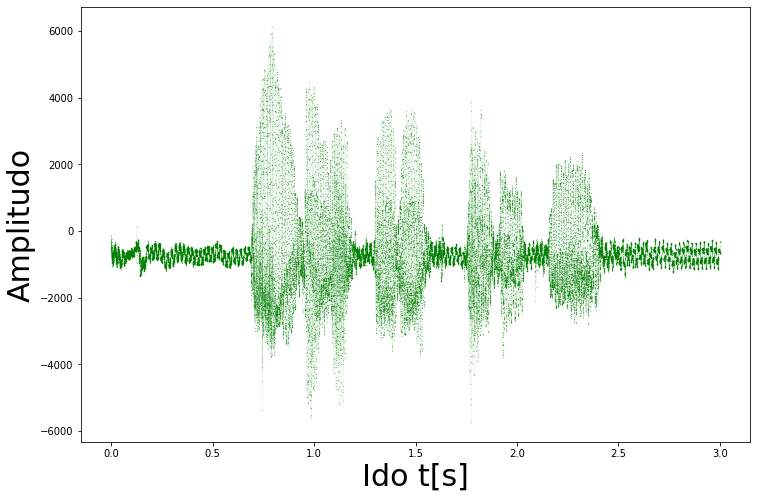

In [0]:
# hangfájl egy lehetséges beolvasása

import scipy.io.wavfile
[sps, data] = scipy.io.wavfile.read('kl_hang.wav')

sps                     # mintavételi frekvencia
n = len(data)           # mintaszám
t = n / sps             # teljes minta időtartama

figsize(12,8)           # az ábra méretének beállítása

tt = linspace(0, t, n); # az időtengely megszerkesztése

plot(tt, data, 'g.-', label='minta', ms=.3, lw = .05)

#tengely cím feliratok
xlabel('Ido t[s]',fontsize=30) 
ylabel('Amplitudo',fontsize=30)


In [0]:
# hangfájl lejátszása
import scipy.io.wavfile
from IPython.display import Audio, display
[sps, data] = scipy.io.wavfile.read('kl_hang.wav')

display(Audio(data=data, rate=sps))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (
    Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
%matplotlib inline

rate = 16000.
duration = .25
t = np.linspace(
    0., duration, int(rate * duration))

def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=rate, autoplay=True))

synth(440)


---

## Video file lejátszása

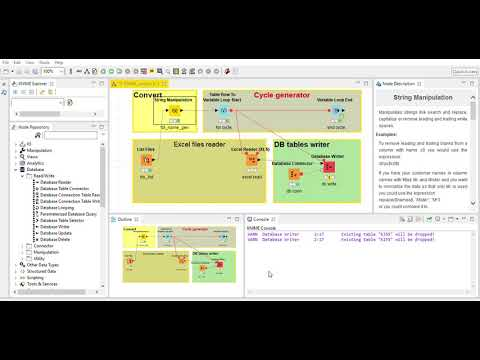

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('toTCRr-cu5Q', width=800, height=600,loop=1)

## Állományok írása

In [0]:
%%writefile first.py
## írás mágikus utasítással
def first(l):
    return l[0]

def test_first():
    assert first([1, 2, 3]) == 1
    assert first([]) is None

Overwriting first.py


In [0]:
%%writefile -a first.py
# File tartalom bővítése (appendÖ)
def test_first2():
    assert first([1, 2, 3]) == 1

Appending to first.py


In [0]:
## Python file futtatás teszt
!pytest first.py


============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.2.1, py-1.8.0, pluggy-0.13.0
rootdir: C:\Users\User\Documents\mintak\jupiter\kl\okt
plugins: arraydiff-0.3, doctestplus-0.4.0, openfiles-0.4.0, remotedata-0.3.2
collected 1 item

first.py F                                                               [100%]

================================== FAILURES ===================================
_________________________________ test_first __________________________________

    def test_first():
        assert first([1, 2, 3]) == 1
>       assert first([]) is None

first.py:7: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

l = []

    def first(l):
>       return l[0]
E       IndexError: list index out of range

first.py:3: IndexError
============================== 1 failed in 0.06s ==============================


In [0]:
## INB állomány feldolgozás

In [0]:
import io
import requests
import json


url = ('https://github.com/klajosw/python/blob/master/kl_diagrammok_minta.ipynb?raw=true')
contents = requests.get(url).text
print(len(contents))

print(contents[:345] + '...' + contents[-33:])

nb = json.loads(contents)
print(nb.keys())
print('nbformat %d.%d' % (nb['nbformat'],
                          nb['nbformat_minor']))

741633
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "name": "kl_diagrammok_minta.ipynb",
      "provenance": [],
      "collapsed_sections": [],
      "include_colab_link": true
    },
    "kernelspec": {
      "display_name": "Python 3",
      "language": "python",
      "name": "python3"
    },
    "language_info":...  }
        }
      ]
    }
  ]
}
dict_keys(['nbformat', 'nbformat_minor', 'metadata', 'cells'])
nbformat 4.0


In [0]:
cells = nb['cells']
nm = len([cell for cell in cells
          if cell['cell_type'] == 'markdown'])
nc = len([cell for cell in cells
          if cell['cell_type'] == 'code'])
print((f"There are {nm} Markdown cells and "
       f"{nc} code cells."))


There are 3 Markdown cells and 25 code cells.


In [0]:
#cells[0]
cells[0]['source'][0]


'<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_diagrammok_minta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>'


---

## WEB lap megjelenitése külön ablakban

In [0]:
from IPython.display import IFrame
IFrame('https://klajosw.blogspot.com/', 600, 200)

In [0]:
## Időzitő és eltelt idő számítás

In [0]:
n = 10000
%timeit sum([1. / i**2 for i in range(1, n)])


4.09 ms ± 57.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%%timeit s = 0.
for i in range(1, n):
    s += 1. / i**2

3.87 ms ± 96.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
import numpy as np
%timeit np.sum(1. / np.arange(1., n) ** 2)


53.1 µs ± 947 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
%%timeit a = np.zeros(10000000)
a *= 2

7.87 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
def aid(x):
    # This function returns the memory
    # block address of an array.
    return x.__array_interface__['data'][0]


In [0]:
a = np.zeros((100, 100))
ax = aid(a)

b = a.reshape((1, -1))
aid(b) == ax

True

In [0]:
a = np.random.rand(5000, 5000)
%timeit a[0, :].sum()

%timeit a[:, 0].sum()


4.45 µs ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
62.2 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## VIDEO kártya lekérdezése

In [0]:
import math
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt
%matplotlib inline

print(len(cuda.gpus))
print(cuda.gpus[0].name)




1
b'Quadro K1100M'
